# Случайные процессы. Прикладной поток.
## Практическое задание 2

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Дедлайн и система оценивания будут объявлены позже.

In [4]:
import numpy as np
import scipy.stats as sps
from collections import Counter  # это может пригодиться
from BranchingProcess import Person, BranchingProcess, read_from_files

from scipy.special import factorial

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
%matplotlib inline

В предыдущем задании вы сделали оценку закона размножения. Скорее всего у вас получилось геометрическое распределение.
Первую часть данного задания выполните, оценив закон размножения геометрическим распределением.

## Часть 1.
Используя оценку закона размножения, посчитайте вероятность вырождения процес- са (ее оценку, если говорить строго). Если эта вероятность равна 1, посчитайте матема- тическое ожидание общего числа частиц в процессе (его оценку, если говорить строго).
Предположим теперь, что каждый род является самостоятельным процессом (а не частью одного большого) и имеет свой закон размножения. Сделайте оценку закона раз- множения каждого рода геометрическим распределением. Если в роду имеются данные о менее 10 мужчинах, то в качестве оценки закона размножения возьмите общую оцен- ку закона размножения, полученную ранее (в случае одного большого процесса). Если в роду нет мужчин, то закон размножения должен быть вырожденным: значение 0 при- нимается с вероятностью 1. Посчитайте вероятность вырождения каждого процесса. Сколько процессов выродится с вероятностью 1? Сколько процессов имеют вероятность вырождения менее 0.5?


**Подсчет вероятности вырождения:** <br>
$\xi \sim Geom(\theta)$ <br>
На семинаре получали, что в данном случае вероятность вырождения $q$:<br>
Если $\theta >= \frac{1}{2} \Rightarrow q = 1$<br>
Если $\theta < \frac{1}{2} \Rightarrow q = \frac{\theta}{1 - \theta}$ <br>
<br>
Для начала найдем $\theta$ аналогично прошлому заданию

**Сначала рассмотрим один общий процесс, найдем для него $\theta$ и посчитаем вероятность вырождения.**

In [5]:
processes = read_from_files(['data/L.txt', 'data/R.txt', 'data/J.txt','data/P.txt', 'data/D.txt',
                             'data/F.txt', 'data/E.txt', 'data/O.txt', 'data/M.txt', 'data/W.txt'])
print(len(processes))

62034


In [6]:
#выборка для всех родов вместе
sample_all_processes = []

for i in range(len(processes)):
    for j in range(len(processes[i].generations) - 1):
        for person in processes[i].generations[j]:
            count_sons = 0
            for child in person.children:
                k = 0
                person_next_generation = processes[i].generations[j+1][k]
                while k < len(processes[i].generations[j+1]) and person_next_generation.name != child:
                    person_next_generation = processes[i].generations[j+1][k]
                    k +=1
                if(k < len(processes[i].generations[j+1]) and person_next_generation.gender == 'male'):
                    count_sons += 1
            if count_sons > 0:
                sample_all_processes.append(count_sons)

Вспомогательная функция из прошлого задания

In [7]:
evaluate = lambda x, overline_Y: (x * (np.exp(x)) / (np.exp(x) - 1)) - overline_Y

def find_theta_geom(sample):
    overline_Y = np.mean(sample)
    return 1 / overline_Y



Находим $\theta$ и вероятность вырождения  $q$

In [10]:
theta_all_processes = find_theta_geom(sample_all_processes)

if(theta_all_processes >= 0.5):
    q = 1
else:
    q = theta_all_processes / (1 - theta_all_processes)
    
print("Вероятность вырождения одного общего процесса = ", q)

Вероятность вырождения одного общего процесса =  0.884665561863


Как видим, вероятность вырождения достаточно большая. Радует, что она хотя бы не равна 1.

**Теперь рассмотрим каждый род отдельно**

In [11]:
#вспомогательный массив, отвечающий за кол-во сыновей у людей из рода i
sample_sons_i = []

#выборка для каждого рода отдельно
sample_processes = []

for i in range(len(processes)):
    for j in range(len(processes[i].generations) - 1):
        for person in processes[i].generations[j]:
            if person.gender == 'male':
                count_sons = 0
                for child in person.children:
                    k = 0
                    person_next_generation = processes[i].generations[j+1][k]
                    while k < len(processes[i].generations[j+1]) and person_next_generation.name != child:
                        person_next_generation = processes[i].generations[j+1][k]
                        k +=1
                    if(k < len(processes[i].generations[j+1]) and person_next_generation.gender == 'male'):
                        count_sons += 1
                if count_sons > 0:
                    sample_sons_i.append(count_sons)
    sample_processes.append(sample_sons_i)
    sample_sons_i = []



**Считаем свое $\theta$ для каждого процесса, учитавая условия про кол-во мужчин в роду**

Если в роду нет мужчин, то закон размножения должен быть вырожденным, то есть значение 0 принимается с вероятностью 1: <br>
$1 = P(\xi = 0) = (1 - \theta)^0 \theta = \theta $<br>
$\Rightarrow \theta = 1$

In [12]:
#массив, в котором храним свою theta для каждого рода
theta_processes = []

for i in range(len(processes)):
    if len(sample_processes[i]) >= 10:
        theta_processes.append(find_theta_geom(sample_processes[i]))
    elif len(sample_processes[i]) != 0:
        theta_processes.append(theta_all_processes)
    else:
        theta_processes.append(1)
    

**Посчитаем вероятности вырождения для каждого процесса по формуле, написанной выше**

In [13]:
degeneracy_probabilities = []
for i in range(len(processes)):
    if(theta_processes[i] >= 0.5):
        degeneracy_probabilities.append(1)
    else:
        degeneracy_probabilities.append(theta_processes[i] / (1 - theta_processes[i]))

degeneracy_probabilities = np.array(degeneracy_probabilities)


In [14]:
print("Количество процессов, которые выродятся с вероятностью 1 :", 
      len(degeneracy_probabilities[degeneracy_probabilities == 1]))
print("Количество процессов, которые выродятся с вероятностью < 0.5 :", 
      len(degeneracy_probabilities[degeneracy_probabilities < 0.5]))

Количество процессов, которые выродятся с вероятностью 1 : 50542
Количество процессов, которые выродятся с вероятностью < 0.5 : 146


**Вывод:** По полученным результатам можем сделать печальный вывод, что есть немаленькая вероятность, что человечество вымрет. Рассмотрев каждый род отдельно, понимаем что бОльшая часть родов перестанет существовать. Но все таки есть небольшая часть родов, которые скорей всего не вымрут. <br>
(В данном случае показатели сильно портит тот факт, что предоставленные данные неполны и существуют много родов, состоящих всего из одного или вообще ни одного мужского поколения)

## Часть 2.
Вопрос: Как будет меняться численность населения и количество фамилий в течении ближайших 200 лет от текущего момента времени? Помимо оценок требуется построить доверительные интервалы.
Условие данного задания не предполагает какого-либо конкретного алгоритма реше- ния, поэтому вам нужно его придумать самим. Вместе с решением вам нужно прислать достаточно подробное текстовое описание вашего способа решения задачи. В этом опи- сании должны быть пояснения, почему вы выбрали такой метод решения. Оцениваться будет не только оригинальность решения, но и его логическая или научная обоснованность. Если вы хотите использовать какие-либо модели, о которых вы узнали из до- полнительных источников (спецкурсы, онлайн-курсы, книги, научные статьи и т.д.), приведите описание этих моделей.
<br>
1
Идеи решения с обсуждения на семинаре:
1. Моделирование процесса на несколько поколений, то есть генерирование новых поколений в соответствии с найденным законом размножения. При генерации стоит генерировать только количество потомков, а не самих людей, иначе не хватит оперативной памяти.
2. Для построения доверительных интервалов можно провести моделирование несколько раз (100-200).
3. Количество поколений, которое нужно сгенерировать, можно определить, оценив среднее время между поколениями.
4. Для каждого рода количество поколений, которое нужно сгенерировать, может быть разным в зависимости от времени жизни последнего известного поколения.
5. Длина временного интервала между поколениями может меняться во времени. Можно попробовать применить регрессию.
6. Закон размножения так же может меняться со временем.

**Удалим все процессы состоящие из одного поколения**

In [16]:
for i in range(len(processes))[::-1]:
    if len(processes[i].generations) < 2:
        del processes[i]

print(len(processes))

17898


### 1. <br> 
**Сначала найдем среднее время между поколениями и его зависимость от года**<br>
Время между поколениями будем считать как среднее между возрастом отца и его сыновей. <br>
При этом предполагаем, что среднее между поколениями зависит только от времени и не зависит от рода.<br>
То есть для каждого отца, родившегося в год $N$ находим среднюю разницу с его детьми и после для всех отцов, родившихся в год $N$ усредняем в независимости от рода.

In [17]:
#массив, в котором будем хранить для каждого отца среднюю разницу во времени между его сыновьями
time_between_generations = []
#массив, в котором будем хранить года рождений этих отцов
time_generations = []

for i in range(len(processes)):
    for j in range(len(processes[i].generations) - 1):
        for person in processes[i].generations[j]:
            #для каждого человека, если он мужчина и определен его год рождения, ищем его сыновей
            if person.gender == 'male' and person.birthday != '':
                birthday_sons = []
                for child in person.children:
                    k = 0
                    #Проходимся по следующему поколению в поисках сына с таким же именем
                    person_next_generation = processes[i].generations[j+1][k]
                    while k < len(processes[i].generations[j+1]) and person_next_generation.name != child:
                        person_next_generation = processes[i].generations[j+1][k]
                        k +=1
                    #Если такой сын был найден и его возраст известен, то запомним его год рождения
                    if(k < len(processes[i].generations[j+1]) and person_next_generation.gender == 'male'
                       and person_next_generation.birthday != ''):
                        birthday_sons.append(int(person_next_generation.birthday.split('-')[0]))
                #Если есть хотя бы один сын чей возраст известен,считаем среднюю разницу между отцом и его сыновьями
                if len(birthday_sons) > 0:
                    time_between_generations.append(np.mean(np.array(birthday_sons)-int(person.birthday.split('-')[0])))
                    time_generations.append(int(person.birthday.split('-')[0]))

time_between_generations = np.array(time_between_generations)
time_generations = np.array(time_generations)
print("Минимальная разница между поколениями:", np.min(time_between_generations))
print("Максимальная разница между поколениями:",np.max(time_between_generations))
print("Средняя разница между поколениями:",np.mean(time_between_generations))
print("Размер выборки:", len(time_generations))

Минимальная разница между поколениями: -375.0
Максимальная разница между поколениями: 443.0
Средняя разница между поколениями: 32.4638146426
Размер выборки: 41741


Как видим по максимальной и минимальной разнице, данные не всегда корректны. Но судя по среднему значению это не сильно портит статистику. Однако для более четкой картины уберем явно не корректные данные. Некорректными данными будем считать разницу меньше 8 и больше 70

In [18]:
i = 0
while i < len(time_generations):
    if(time_between_generations[i] < 8 or time_between_generations[i] > 70):
        time_between_generations = np.delete(time_between_generations, i)
        time_generations = np.delete(time_generations, i)
        i-=1
    i+=1

print("Минимальная разница между поколениями:", np.min(time_between_generations))
print("Максимальная разница между поколениями:",np.max(time_between_generations))
print("Средняя разница между поколениями:",np.mean(time_between_generations))
print("Размер выборки:", len(time_generations))

Минимальная разница между поколениями: 8.0
Максимальная разница между поколениями: 70.0
Средняя разница между поколениями: 32.6691751516
Размер выборки: 41176


Как и предполагалось, среднее значение почти не изменилось ввиду очень большого размера данных.

Нанесем на плоскость точки выборки (зависимость разницы между поколениями от времени)

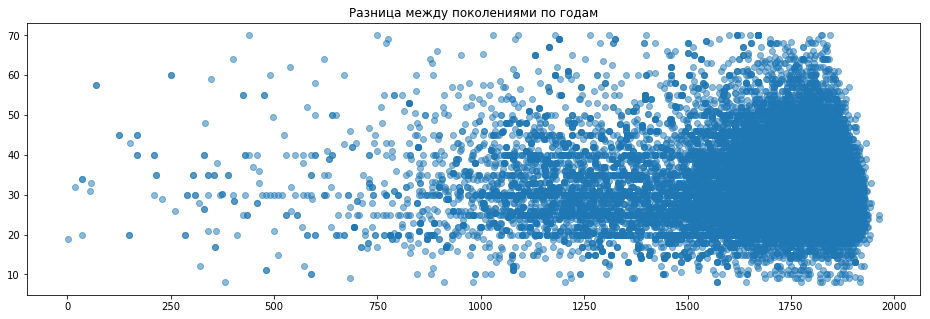

In [19]:
plt.figure(figsize=(16, 5))
plt.title("Разница между поколениями по годам")
plt.scatter(time_generations, time_between_generations, alpha = 0.5)
plt.show()

Для более четкой картины, усредним по каждому году полученные значения разниц поколений

In [20]:
#кол-во встречаний определенного года
count_years = dict()
#сумма значений по каждому году
sum_differences = dict()

for i in range(len(time_generations)):
    if time_generations[i] in count_years.keys():
        count_years[time_generations[i]] += 1
    else:
        count_years[time_generations[i]] = 1
        
    if time_generations[i] in sum_differences.keys():
        sum_differences[time_generations[i]] += time_between_generations[i]
    else:
        sum_differences[time_generations[i]] = time_between_generations[i]
        
years = []
mean_differences = []

for year in count_years.keys():
    years.append(year)
    mean_differences.append(sum_differences[year] / count_years[year])


Нанесем на плоскость полученные точки. <br>
(Второй график - увеличение первого на года 1500 - 2000)

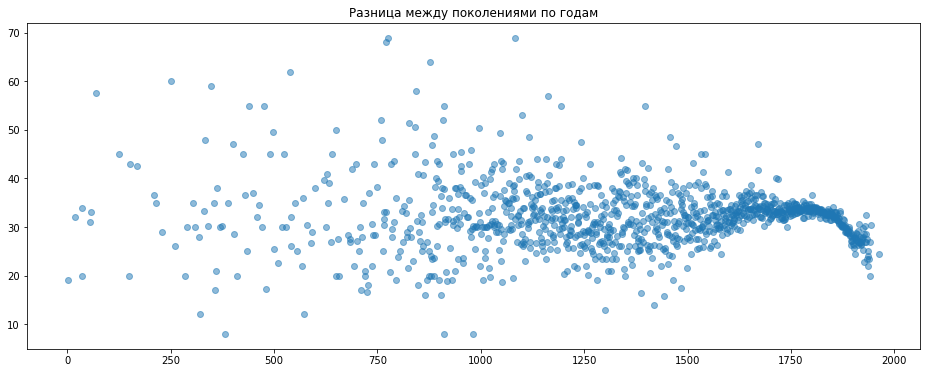

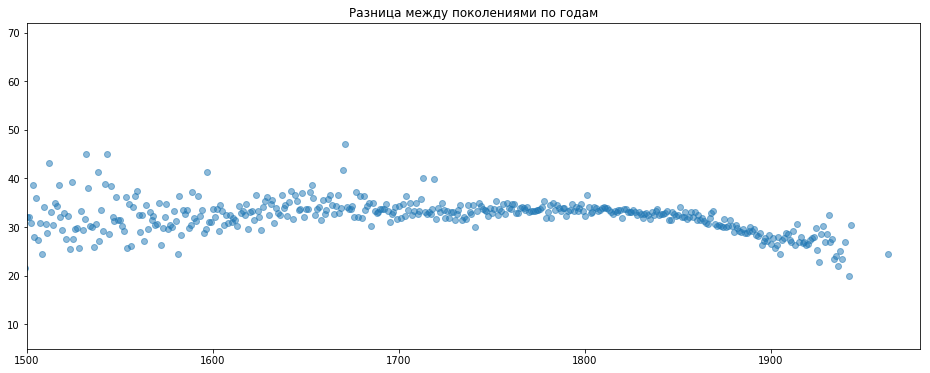

In [21]:
plt.figure(figsize=(16, 6))
plt.title("Разница между поколениями по годам")
plt.scatter(years, mean_differences, alpha = 0.5)
plt.show()

plt.figure(figsize=(16, 6))
plt.title("Разница между поколениями по годам")
plt.scatter(years, mean_differences, alpha = 0.5)
plt.xlim(1500, 1980)
plt.show()

Из графика видно, что в первые 1500 тысячи лет есть большой разброс в разнице между поколениями, что связано с неполнотой и некорректностью данных. При этом начиная с 1500 года график похож на прямую. К тому же мы предполагали, что средняя разница между поколениями не зависит от рода, поэтому можем считать, что разница между поколениями зависит только от времени, причем линейно, то есть: <br>
$\overline{DifBetweenGenerations(t)} = t_0 + k*t $ <br>

Тогда применим линейную регрессию и запомним полученные данные. Они понадобятся нам при генерации новых поколений.

In [23]:
res_linear_regres = sps.linregress(time_generations, time_between_generations)
k_lin = res_linear_regres.slope
t_0 = res_linear_regres.intercept
print(res_linear_regres)

LinregressResult(slope=-0.00061344509747811955, intercept=33.724869604099865, rvalue=-0.015188218623898537, pvalue=0.0020557490424644429, stderr=0.00019902481656406662)


Как видим, время между поколениями уменьшается со временем, но разница совсем небольшая (что вполне логично). <br>
А $t_0 = 33.72$ в данном случае (ввиду маленького k_lin) означает, что средняя разница между поколениями примерно 34-30 лет.

 ### 2. <br>
 **Теперь сгенерируем новые поколения. ** <br>Для каждого рода будем хранить только кол-во людей в каждом поколении и средний год рождения этого поколения.

Найдем кол-во мужчин, живущих на данный момент, у которых еще нет детей. 
Предполагаем, что предпоследнее поколение больше не будет рожать детей.
При этом, чтоб рассматривать только ныне жевущее последнее поколение, будем рассматривать людей, которые живы (то есть посмотрим на строку deathdate)

In [24]:
#массив, в котором для каждого процесса будем хранить мужчин из последнего поколения
last_gen = []
#массив, со средним временем рождения последнего поколения для каждого рода
years = []
#кол-во людей в последнем ныне живущем поколении рода i
last_gen_i = 0
#сумма годов рождения в последнем поколении для рода i
year_i = 0
#массив, в котором будем хранить theta для выбранных родов
theta = []

for i in range(len(processes)):
    last_gen_i = 0
    year_i = 0
    for person in processes[i].generations[-1]:
        if person.gender == 'male' and person.birthday != '' and person.deathdate == '':
            last_gen_i += 1
            year_i+= int(person.birthday.split('-')[0])
    if(last_gen_i > 0):
        last_gen.append(last_gen_i)
        years.append(year_i / last_gen_i)
        theta.append(theta_processes[i])
        


Для разницы между поколениями воспользуемся полученными результатами из линейной регрессии. <br>
Получим, что $t(generation_{n+1}) = k * t(generation_n) + t_0 + t(generation_n)$

Сначала сгенерируем одно следующее поколение. <br> Для этого для каждого рода сгенерируем выборку из геометрического распределения с $\theta $ для этого рода. <br> А именно для каждого рода (назовем его $R$) рассматриваем последнее ныне живущее поколение, в котором $n$ человек и генерируем выборку $\xi_1, ..., \xi_n \in Geom(\theta_R)$ <br>
Тогда в следующем поколении будет $\sum_{i = 1}^n {\xi_i}$ человек. <br>
Иначе говоря: <br> n = $X_k$ - последнее ныне живущее поколение в роду $R$. <br> 
Тогда $X_{k+1} = \sum_{i = 1}^{X_k} \xi_i^{(k)} = \sum_{i = 1}^n \xi_i$ - кол-во людей в следующем поколении в роду $R$ <br><br>
При этом учтем то, что sps.geom.rvs генерирует выборку без нулей, поэтому из каждого элемента выборки вычтем 1, так как если посмотреть на вероятности двух видов геометрического распределения: $P_{with0}(x) = (1 - \theta)^x \theta$  и  $P_{without0}(x) = (1 - \theta)^{x - 1} \theta$, то можно понять, что $P_{without0}(x) = P_{with0}(x - 1)$

In [25]:
#храним для каждого рода массив из пар, где каждая пара соответствует определенному поколению в это роде.
#Пара - (кол-во людей в этом поколении этого рода, время этого поколения)
new_generations = []

for i in range(len(last_gen)):
    first_count = sps.geom(theta[i]).rvs(size=last_gen[i]) - 1
    first_year = round(years[i] + k_lin * years[i] + t_0, 3)
    first_generation = [(np.sum(first_count), first_year)]
    new_generations.append(first_generation)


Теперь будем генерировать последующие поколения пока не дойдем до 2220 года: для каждого рода отдельно последовательно создаем новые поколения, генерируя выборки из геометрического распределения и делая шаги в несколько лет по результатам линейной регрессии.

In [27]:
%%time

for i in range(len(last_gen)):
    #генерируем пока не дойдем до 2220 года или пока род не исчезнет
    while new_generations[i][-1][1] < 2220 and new_generations[i][-1][0] != 0:
        next_count = sps.geom(theta[i]).rvs(new_generations[i][-1][0]) - 1
        next_year = new_generations[i][-1][1] + k_lin * new_generations[i][-1][1] + t_0
        next_generation = (np.sum(next_count), next_year)
        new_generations[i].append(next_generation)

CPU times: user 1.79 s, sys: 16.1 ms, total: 1.8 s
Wall time: 1.82 s


(Работает довольно быстро, что связано с тем, что на моих данных получились такие $\theta$, что почти все рода вымирают)

### 3.
**Посмотрим, что получилось.** <br>
Для этого для каждого года посчитаем кол-во существующих родов на момент этого года и кол-во людей, живущих в этом году, а так же посмотрим как размножались отдельно каждый род.

Вначале найдем среднее время жизни людей начиная с 1600 года. Это нам понадобится далее. Такой выбор года обусловлен тем, что раньше продолжительность жизни людей была явно меньше, чем сейчас.

In [28]:
ages = []
for i in range(len(processes)):
    for generation in processes[i].generations:
        for person in generation:
            if person.birthday != '' and person.deathdate != '' and int(person.birthday.split('-')[0]) > 1600:
                ages.append(int(person.deathdate.split('-')[0]) - int(person.birthday.split('-')[0]))

mean_age = np.mean(ages)
print("Среднее продолжительность жизни, начиная с 1600 года :", round(mean_age, 2))

Среднее продолжительность жизни, начиная с 1600 года : 57.88


**Сначала найдем кол-во родов по годам** <br>
Считаем что, если год последнего поколения в роду больше, чем текуший год, то этот род существовал на момент этого года.<br> Предыдущее поколение живет пока текущему поколению в среднем не исполнилось (mean_age$ - t_{bg}$) = mean_age - $k_{lin}*t - t_0$ лет, где $t_{bg}$ - время между поколениями <br> 
Если же процесс выродился, то последние поколение будет состоять из 0 человек и тогда как раз прибавив (mean_age$ - t_{bg}$) к году поколения (в котором 0 человек), получим время жизни предыдущего поколения.<br>
(В моем new_generations если процесс выродился, то последнее поколение в нем имеет определенный год и состоит из 0 человек)

Вначале: 2034 родов
2200 год: 177 родов


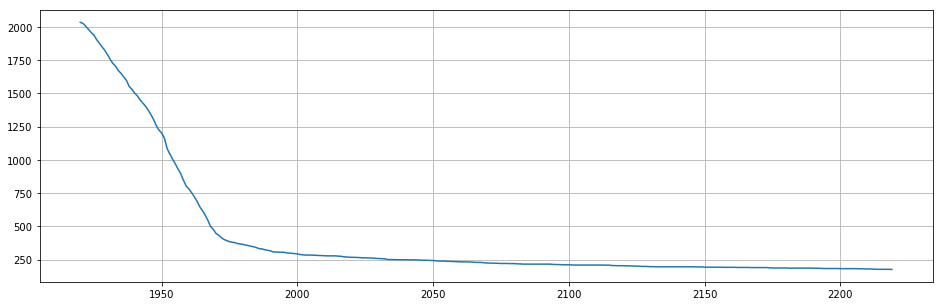

In [54]:
count_processes = []
array_years = np.arange(1920, 2220, 1)

count_proc_in_year = 0

for year in array_years:
    for i in range(len(new_generations)):
        if(new_generations[i][-1][1] + (mean_age - k_lin*year - t_0) > year):
            count_proc_in_year += 1
    count_processes.append(count_proc_in_year)
    count_proc_in_year = 0

print("Вначале:", count_processes[0], "родов")
print("2200 год:", count_processes[-1], "родов")

plt.figure(figsize=(16, 5))
plt.plot(array_years, count_processes)
plt.grid()
plt.show()

Из графика видно, что бOльшая часть родов исчезла.

**А теперь посмотрим как изменялась численность каждого рода по годам** <br>
Для этого будем считать, что в каждом году живут люди в поколении, которое уже родилось к этому году и родилось не больше, чем mean_age лет назад <br>
(Второй график - увеличение первого)

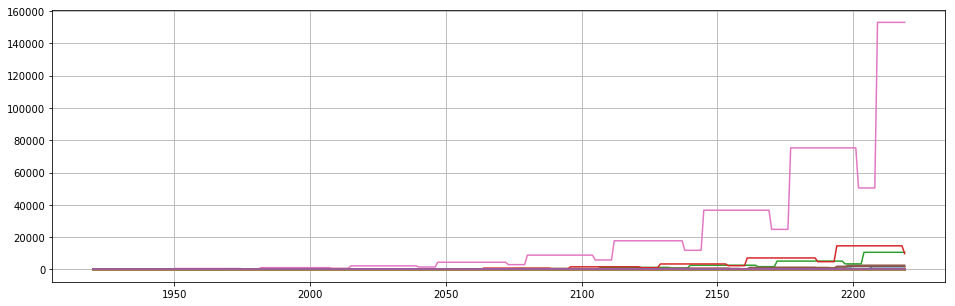

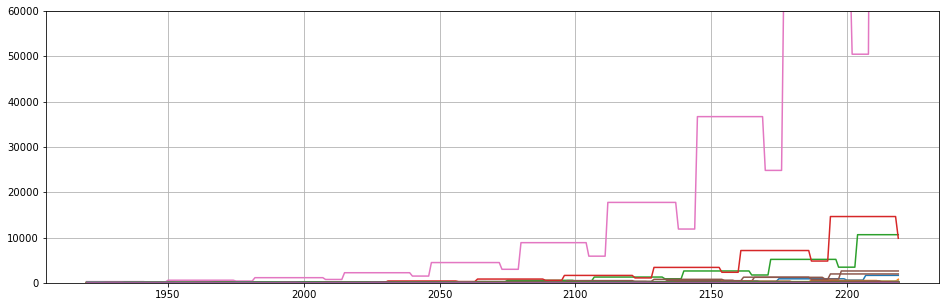

In [30]:
count_people_all_processes = []

for i in range(len(new_generations)):
    count_people_in_proc = []
    for year in array_years:
        count_people_in_year_in_proc = 0
        for generation in new_generations[i]:
            if generation[1] < year and generation[1] > year - mean_age:
                count_people_in_year_in_proc += generation[0]
        count_people_in_proc.append(count_people_in_year_in_proc)
    count_people_all_processes.append(count_people_in_proc)

plt.figure(figsize=(16,5))
for i in range(len(new_generations)):
    plt.plot(array_years, count_people_all_processes[i])
plt.grid()
plt.show()

plt.figure(figsize=(16,5))
for i in range(len(new_generations)):
    plt.plot(array_years, count_people_all_processes[i])
plt.grid()
plt.ylim(0, 60000)
plt.show()

Как видим большинство родов вымерло, что поняли еще из предыдущего графика. Есть рода, которые не вымерли, а незначительно повысили свою численность. Однако очень небольшая часть родов очень сильно увеличила свою численность.

**Найдем кол-во людей по годам** <br>
Опять же будем считать, что в каждом году живут люди в поколении, которое уже родилось и родилось не больше, чем mean_age лет назад

Вначале: 1943 людей
2200 год: 189476 людей


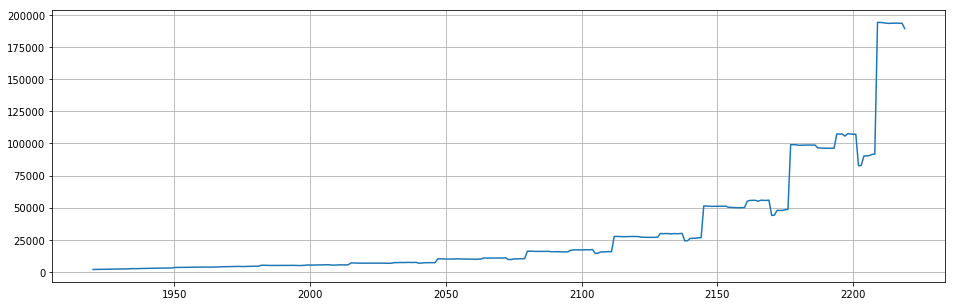

In [55]:
count_people = []

for year in array_years:
    count_people_in_year = 0
    for i in range (len(new_generations)):
        for generation in new_generations[i]:
            if generation[1] < year and generation[1] > year - mean_age:
                count_people_in_year += generation[0]
    count_people.append(count_people_in_year)

print("Вначале:", count_people[0], "людей")
print("2200 год:", count_people[-1], "людей")
    
plt.figure(figsize=(16, 5))
plt.plot(array_years, count_people)
plt.grid()
plt.show()

Численность начеления растет с большой скоростью. Ступенчатость же графика объясняется тем, что мы не генерировали каждого человека, а генерировали сразу целое поколение в определенный год. <br>
Результаты также согласовываются и с предыдущими графиками: многие рода вымирают, однако некоторые из родов сильно увеличивают свою численность и за счет чего сильно увеличивается численность всего населения

### 4. 
** Построим доверительные интервалы** <br>
Для этого запустим код генерации 200 раз и посмотрим на полученные результаты для количества людей и количества родов
<br> (Не забываем об оссобенностях функции sps.geom.rvs)

In [33]:
#сделаем функцию по аналогии с уже написанной генерацией

#напоминание: last_gen - массив, в котором last_gen[i] -кол-во людей в последнем живущим 
#поколении рода i(нули не учитываются, то есть уже вымершие рода не рассматриваем)

def generate():
    generations = []
    #генерируем одно поколение
    for i in range(len(last_gen)):
        first_count = sps.geom(theta[i]).rvs(size=last_gen[i]) - 1
        first_year = round(years[i] + k_lin * years[i] + t_0, 3)
        first_generation = [(np.sum(first_count), first_year)]
        generations.append(first_generation)

    #генерируем последующие поколения
    for i in range(len(last_gen)):
        #генерируем пока не дойдем до 2220 года или пока род не исчезнет
        while generations[i][-1][1] < 2220 and generations[i][-1][0] != 0:
            next_count = sps.geom(theta[i]).rvs(generations[i][-1][0]) - 1
            next_year = generations[i][-1][1] + k_lin * generations[i][-1][1] + t_0
            next_generation = (np.sum(next_count), next_year)
            generations[i].append(next_generation)
    return generations

Теперь запустим функцию generate 200 раз

In [34]:
%%time

different_generations = [generate() for i in range(200)]

CPU times: user 11min 41s, sys: 10.7 s, total: 11min 51s
Wall time: 11min 50s


Для каждой генерации найдем кол-во людей и кол-во родов на момент 2220 года аналогично тому, как сделали это раньше

In [35]:
counts_people_in_dif_gen = []
counts_processes_in_dif_gen = []

#находим кол-во людей
for i in range(len(different_generations)):
    #кол-во людей в i-ой генерации
    count_people_i = 0
    for process in different_generations[i]:
        for generation in process:
            if generation[1] < future and generation[1] > 2220 - mean_age:
                count_people_i += generation[0]
    counts_people_in_dif_gen.append(count_people_i)
    
        
#находим кол-во родов      
for i in range(len(different_generations)):
    #кол-во родов в i-ой генерации
    count_processes_i = 0
    for process in different_generations[i]:
        if process[-1][1] + (mean_age - k_lin*year - t_0) > 2220:
            count_processes_i += 1
    counts_processes_in_dif_gen.append(count_processes_i)
    

Теперь для нахождения доверительных интервалов уберем выбросы, а именно удалим 10 самых больших и 10 самых маленький значений

In [50]:
counts_people_result = np.sort(counts_people_in_dif_gen)
counts_people_result = counts_people_result[10:-10]

counts_processes_result = np.sort(counts_processes_in_dif_gen)
counts_processes_result = counts_processes_result[10:-10]

Доверительным интервалом будет служить интервал от минимального до максимального значения

In [51]:
print("Доверительный интервал для кол-ва людей к 2220 году:",
     np.min(counts_people_result), "-", np.max(counts_people_result))

print("Доверительный интервал для количества родов к 2220 году:",
      np.min(counts_processes_result), "-", np.max(counts_processes_result))

Доверительный интервал для кол-ва людей к 2220 году: 184581 - 9150807
Доверительный интервал для количества родов к 2220 году: 146 - 177


Для наглядности нанесем точки на плоскость 

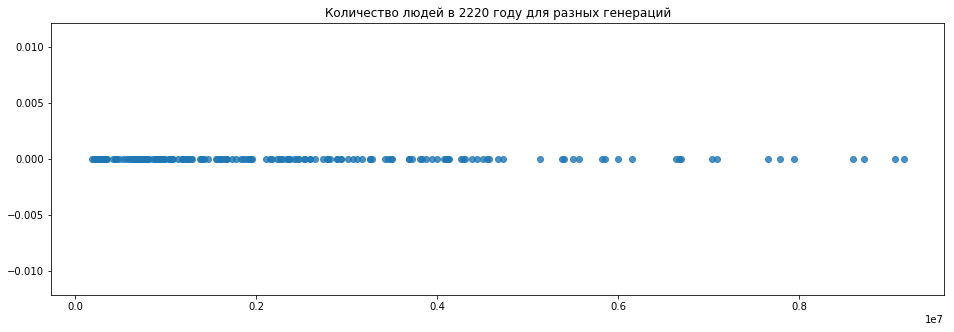

In [38]:
plt.figure(figsize=(16, 5))
plt.title("Количество людей в 2220 году для разных генераций")
plt.scatter(counts_people_result, np.zeros(len(counts_people_result)), alpha=0.8)
plt.show()

Из графика видно, что бОльшая часть моделирований привела к численности людей к 2220 году порядка 200000 - 3000000 и лишь в редких случаях численность достигла 5-9 миллионов.

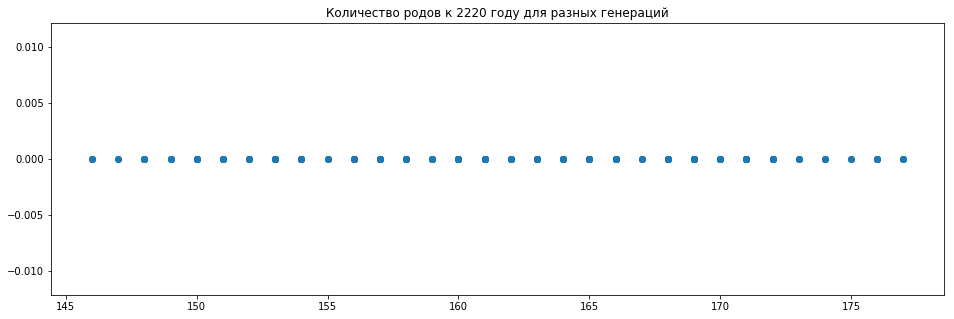

In [39]:
plt.figure(figsize=(16, 5))
plt.title("Количество родов к 2220 году для разных генераций")
plt.scatter(counts_processes_result, np.zeros(len(counts_processes_result)))
plt.show()

**Вывод:** <br>
Мы смоделировали процесс размножения в ближайшие 200 лет и убеделись в результатах, полученных в части 1. БОльшая часть родов действительно перестает существовать. <br>
Численность же населения растет за счет сильного распространения небольшого числа родов. <br>
Доверительный интервал для кол-ва родов получился - (146, 177), из чего еще раз уже из нескольких проведенных моделирований можем сделать вывод, что выживает лишь небольшое число родов. <br>
Доверительный интервал для численности населения получился достаточно большим, поэтому нельзя утверждать, что численность населения к 2220 году возрастет в сотни раз, однако в каждой генерации получилось, что кол-во людей достаточно сильно увеличилось. <br>
Еще по моделированию можно понять, что может случится так, что почти всё население будет являться частью одного рода. <br>
Также обнаружили несколько интересных фактов и зависимостей, о которых было сказано ранее.